#### Imports

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

#### Constants

In [19]:
# Output parent folder
OUTPUT_PARENT_FOLDER = "outputs/"

SUMMARY_FILENAME = "repairs_summary"

ALGORITHMS = [
    "INTERPOLATION",
    "GLASS",
    "JVTS",
    "ALUR",
]

#### Utils

In [69]:
def count_num_spec_repaired(input_folder):
    if not os.path.exists(input_folder):
        print("Folder does not exist:", input_folder)
        return
     
    count = dict()
    for algorithm in ALGORITHMS:
        input_folder_name = os.path.basename(input_folder)
        output_folder = os.path.join(OUTPUT_PARENT_FOLDER, input_folder_name, algorithm)

        repairs_summary_file = os.path.join(output_folder, f"{SUMMARY_FILENAME}_{input_folder_name}_{algorithm}.csv")

        if os.path.exists(repairs_summary_file):
            df = pd.read_csv(repairs_summary_file)
            repaired_specs = df[df["NumRepairs"] > 0]
            num_repaired = len(repaired_specs)
            count[algorithm] = num_repaired
        else:
            print("File does not exist:", repairs_summary_file)
    return count

def display_percentage_table(count, total_amba_specs):
    markdown_table = "| Algorithm | Percentage Repaired |\n"
    markdown_table += "|-----------|--------------------|\n"

    for algorithm, repaired_specs in count.items():
        percentage_repaired = (repaired_specs / total_amba_specs) * 100
        markdown_table += f"| {algorithm} | {percentage_repaired:.2f}% |\n"

    display(Markdown(markdown_table))

def plot_num_spec_repaired(input_folder, count):
    if not os.path.exists(input_folder):
        print("Folder does not exist:", input_folder)
        return
    
    # Create a bar plot
    plt.figure(figsize=(10,5))
    plt.bar(count.keys(), count.values())
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("# Specifications", fontsize=12)
    plt.title(f"Number of Specifications Repaired in {os.path.basename(input_folder)}", fontsize=12)
    plt.xticks(fontsize=12)

    # Add numbers above each bar
    for benchmark, count in count.items():
        plt.text(benchmark, count + 0.05, str(count), ha="center", va="bottom", fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()
    

## Number of Specifications Repaired

In [60]:
TOTAL_AMBA_SPECS = 9
TOTAL_SYNTECH15_UNREAL_SPECS = 14
TOTAL_SYNTECH15_1UNREAL_SPECS = 130

| Benchmark            | AMBA | SYNTECH15-UNREAL | SYNTECH15-1UNREAL |
|----------------------|------|------------------|-------------------|
| Number of Specifications  | 9 | 14 | 130 |

### AMBA

In [61]:
input_folder = "inputs/AMBA"
count = count_num_spec_repaired(input_folder)

File does not exist: outputs/AMBA/INTERPOLATION/repairs_summary_AMBA_INTERPOLATION.csv


In [62]:
display_percentage_table(count, TOTAL_AMBA_SPECS)

| Algorithm | Percentage Repaired |
|-----------|--------------------|
| GLASS | 100.00% |
| JVTS | 0.00% |
| ALUR | 11.11% |


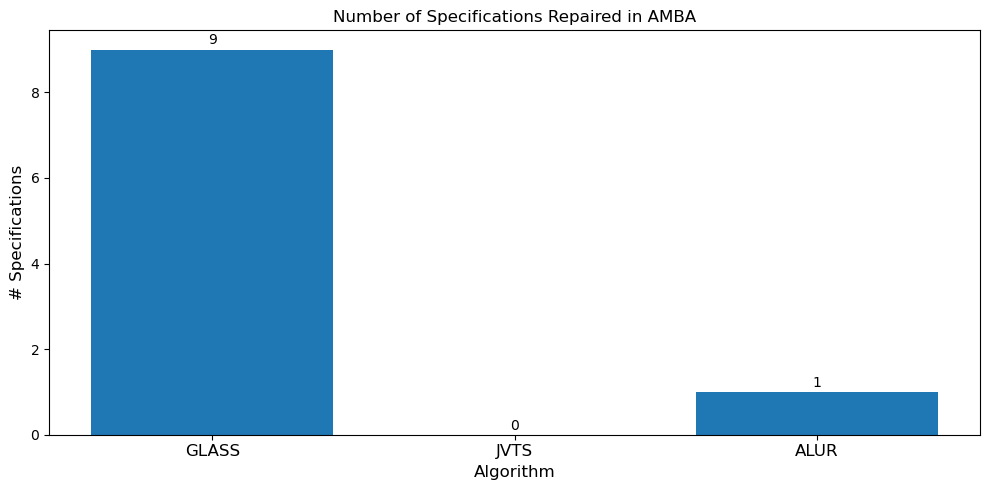

In [63]:
plot_num_spec_repaired(input_folder, count)

### SYNTECH15-UNREAL

In [64]:
input_folder = "inputs/SYNTECH15-UNREAL"
count = count_num_spec_repaired(input_folder)

File does not exist: outputs/SYNTECH15-UNREAL/INTERPOLATION/repairs_summary_SYNTECH15-UNREAL_INTERPOLATION.csv


In [65]:
display_percentage_table(count, TOTAL_SYNTECH15_UNREAL_SPECS)

| Algorithm | Percentage Repaired |
|-----------|--------------------|
| GLASS | 85.71% |
| JVTS | 35.71% |
| ALUR | 14.29% |


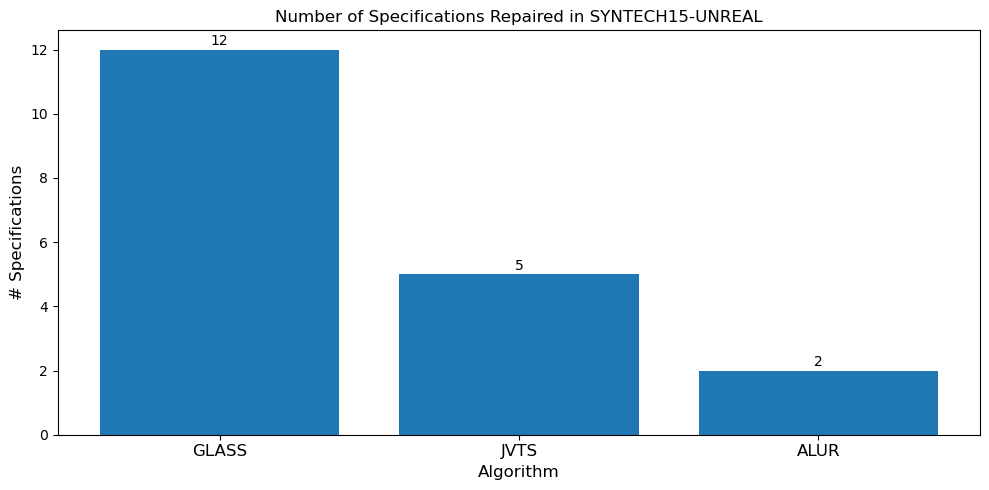

In [66]:
plot_num_spec_repaired(input_folder, count)

### SYNTECH15-1UNREAL

In [73]:
input_folder = "inputs/SYNTECH15-1UNREAL"
count = count_num_spec_repaired(input_folder)

File does not exist: outputs/SYNTECH15-1UNREAL/INTERPOLATION/repairs_summary_SYNTECH15-1UNREAL_INTERPOLATION.csv
File does not exist: outputs/SYNTECH15-1UNREAL/GLASS/repairs_summary_SYNTECH15-1UNREAL_GLASS.csv
File does not exist: outputs/SYNTECH15-1UNREAL/JVTS/repairs_summary_SYNTECH15-1UNREAL_JVTS.csv
File does not exist: outputs/SYNTECH15-1UNREAL/ALUR/repairs_summary_SYNTECH15-1UNREAL_ALUR.csv


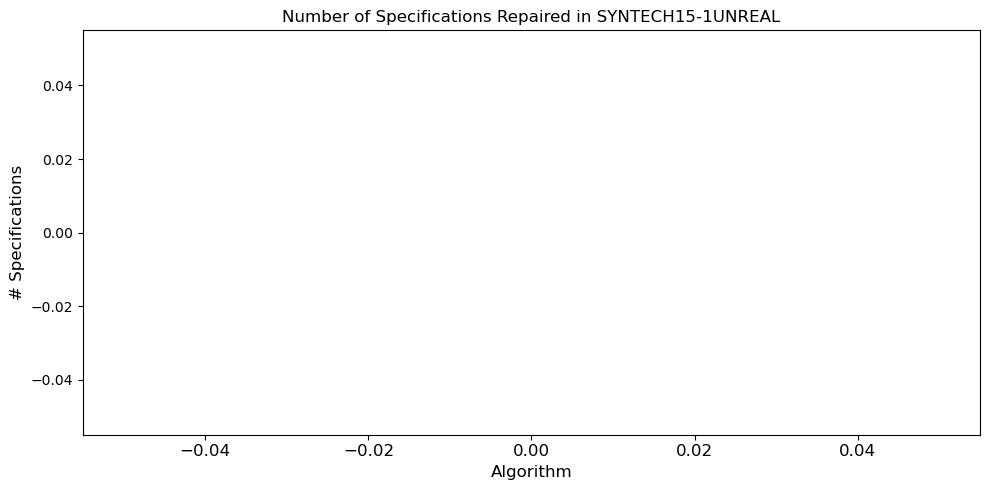

In [74]:
plot_num_spec_repaired(input_folder, count)